In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [2]:
# Now we need to read in the data 

df = pd.read_csv(r'D:\Python\movies.csv')

In [3]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
pd.isnull(df).sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

NameError: name 'pct_missing' is not defined

In [6]:
# Data types of Columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# Change data type
df = df.fillna(0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [30]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2  5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3   286       5      4  1980      1493    7.7   221000.0      1301    2001   
4  1027       7      4  1980      1544    7.3   108000.0      1054     522   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1048       55  19000000   46998772     2320    146.0           15  
1   328       56   4500000   58853106      732    104.0           14  
2  1746       56  18000000  538375067     1541    124.0           15  
3  2247       56   3500000   83453539     1813     88.0           14  
4   411       56   6000000   39846344     1778     98.0           14

In [31]:
df['yearcorrect']= df['released'].astype(str).str[:4]
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2  5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3   286       5      4  1980      1493    7.7   221000.0      1301    2001   
4  1027       7      4  1980      1544    7.3   108000.0      1054     522   

   star  country    budget      gross  company  runtime yearcorrect  
0  1048       55  19000000   46998772     2320    146.0        1706  
1   328       56   4500000   58853106      732    104.0        1493  
2  1746       56  18000000  538375067     1541    124.0        1772  
3  2247       56   3500000   83453539     1813     88.0        1493  
4   411       56   6000000   39846344     1778     98.0        1544

In [10]:
df.sort_values(by=['gross'], inplace = False, ascending= False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century      0   Comedy  1989   
7667                                   Tee em el      0   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime yearcorrect  
5445  2847246203            Twentieth Century Fox    162.0        Dece  
7445  2797501328                   Marvel Studios    181.0        Apri  
3045  2201647264            Twentieth Century Fox    194.0        Dece  
6663  2069521700                        Lucasfilm    138.0        Dece  
7244  2048359754                   Marvel Studios    149.0        Apri  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment     92.0        Janu  
1614           0                    Allied Vision     85.0        Apri  
1606           0  Trans World Entertainment (TWE)     89.0        Apri  
1601           0         Budapest Stúdió Vállalat    104.0        Janu  
7667           0                      PK 65 Films    102.0        Augu  

[7668 rows x 16 columns]

In [11]:
pd.set_option('display.max_rows', None)

In [32]:
# drop any Duplicates

df.drop_duplicates()
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1  5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2  5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3   286       5      4  1980      1493    7.7   221000.0      1301    2001   
4  1027       7      4  1980      1544    7.3   108000.0      1054     522   

   star  country    budget      gross  company  runtime yearcorrect  
0  1048       55  19000000   46998772     2320    146.0        1706  
1   328       56   4500000   58853106      732    104.0        1493  
2  1746       56  18000000  538375067     1541    124.0        1772  
3  2247       56   3500000   83453539     1813     88.0        1493  
4   411       56   6000000   39846344     1778     98.0        1544

In [13]:
# Budget high correlation
# company high correlation

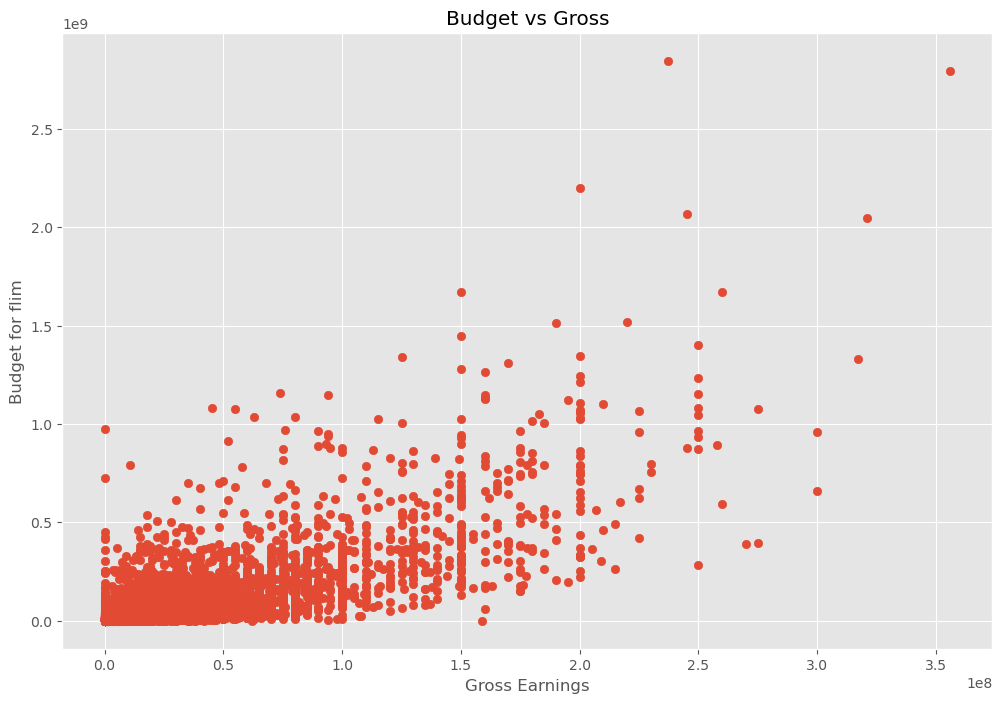

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y= df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for flim')
plt.show()

In [15]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

<AxesSubplot:xlabel='budget', ylabel='gross'>

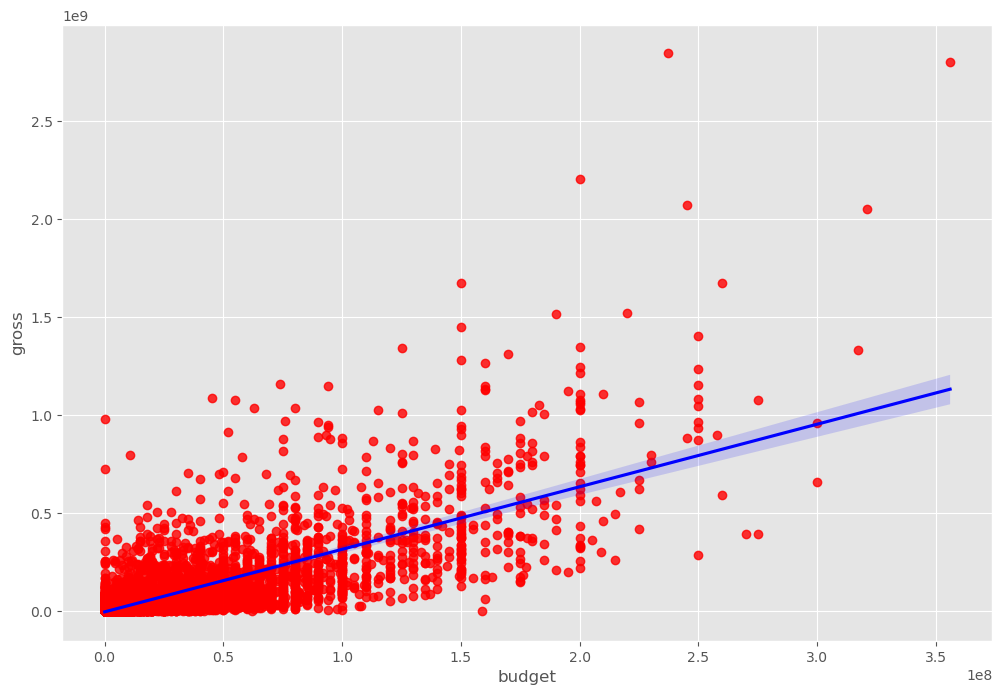

In [16]:
# Plot Budget vs Gross using Seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='score', ylabel='gross'>

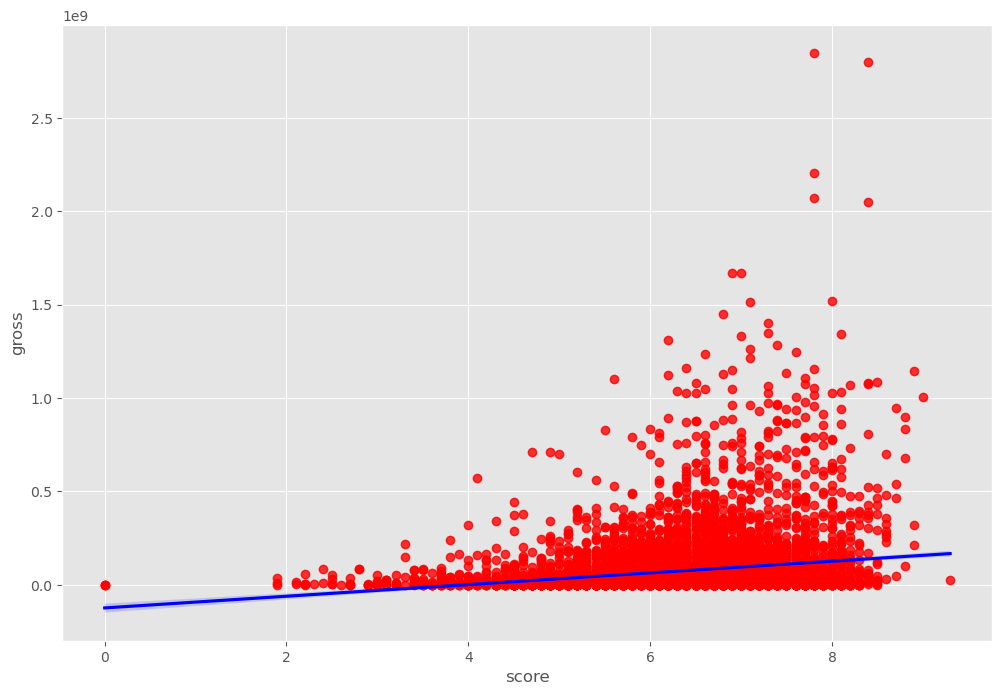

In [17]:
sns.regplot(x="score", y="gross", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

<AxesSubplot:xlabel='rating', ylabel='gross'>

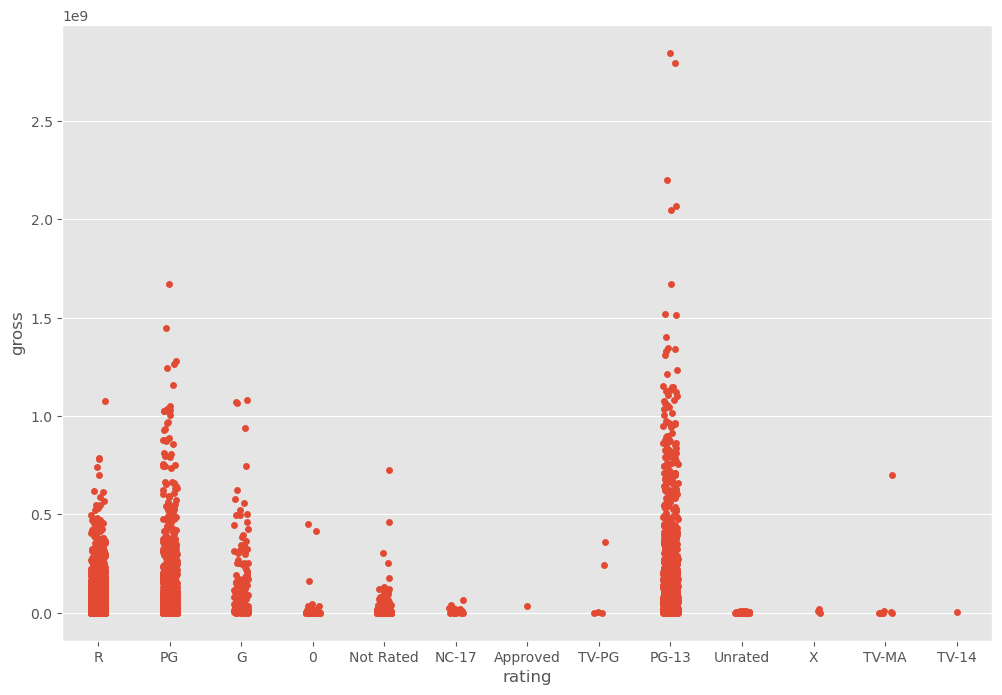

In [18]:
sns.stripplot(x="rating", y="gross", data=df)

In [19]:
# Let's Start Looking at Correlation
# Types : Pearson, Kendall, Spearman 

In [20]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000

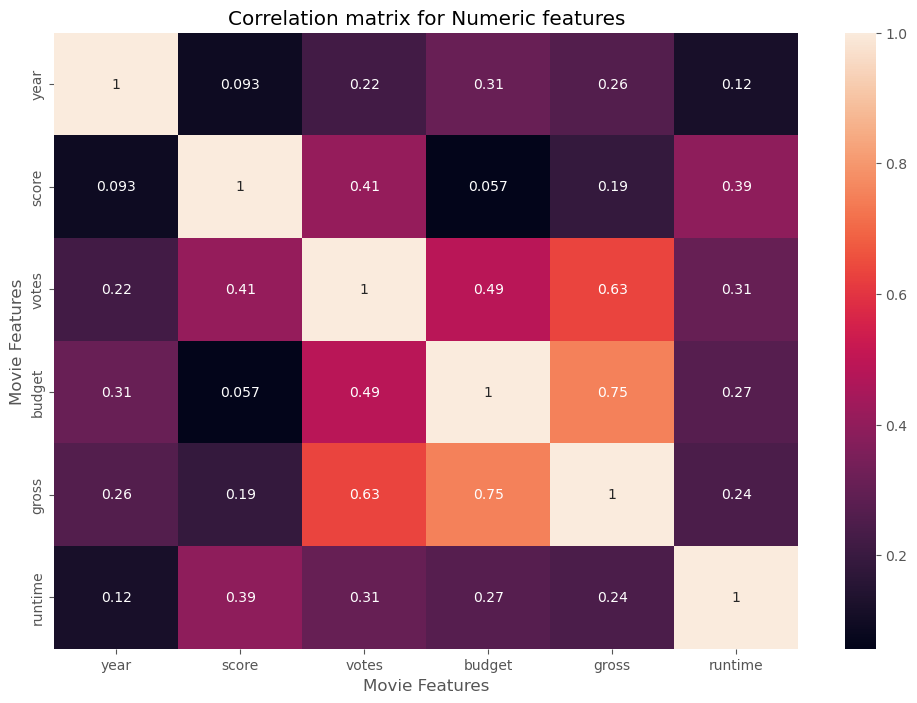

In [21]:
corr_mat = df.corr(method='pearson')

sns.heatmap(corr_mat, annot=True)

plt.title('Correlation matrix for Numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
# For company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        June  
1   58853106   Columbia Pictures    104.0        July  
2  538375067           Lucasfilm    124.0        June  
3   83453539  Paramount Pictures     88.0        July  
4   39846344      Orion Pictures     98.0        July

In [23]:
df_numerized= df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized
        

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       7      6  1980      1706    8.4   927000.0      2589    4015   
1     5573       7      1  1980      1493    5.8    65000.0      2269    1633   
2     5142       5      0  1980      1772    8.7  1200000.0      1111    2568   
3      286       5      4  1980      1493    7.7   221000.0      1301    2001   
4     1027       7      4  1980      1544    7.3   108000.0      1054     522   
5     2109       7     10  1980      2503    6.4   123000.0      2528    4363   
6     5574       7      0  1980      1772    7.9   188000.0      1412     839   
7     4436       7      3  1980       700    8.2   330000.0      1829    1770   
8     5281       5      0  1980      1754    6.8   101000.0      2306    1980   
9     6213       7      3  1980      2287    7.0    10000.0      2864     424   
10     463       5      0  1980       675    6.1    18000.0       357    3986   
11    5920       5      1  1980      2988    7.3    54000.0      1199    1833   
12    4315       5      1  1980       627    5.3    30000.0      2352    2334   
13    4084       7      6  1980      3212    7.7    49000.0      2388    2328   
14    1687       7      5  1980      1544    7.1    37000.0       318     521   
15    5024       5      6  1980      3022    7.2    27000.0      1243    3549   
16    1900       7      6  1980      2287    6.6    21000.0        49     736   
17      92       5      4  1980       700    6.9    29000.0       514    3263   
18    5865       7     10  1980      1109    6.8    66000.0      1374    2105   
19    5189       7      4  1980       627    6.8    26000.0      2561     557   
20    1387       7      5  1980       946    6.5    20000.0      2891    4452   
21    2451       7      1  1980       161    6.8    14000.0      1892    2927   
22    5845       5      0  1980       282    6.7    22000.0       744    4193   
23    7445       5      8  1980       586    5.3    12000.0      2371    3529   
24    7127       5      6  1980      1914    6.4    14000.0      1153      13   
25     346       7     10  1980       774    6.9    33000.0      1583    3235   
26    3263       7      4  1980      2060    6.5     5100.0      2433    2484   
27    4442       5      0  1980       282    5.0     4100.0      1282      34   
28     980       7      5  1980      1772    7.2    17000.0      2673    4387   
29     362       7      5  1980       887    6.2    22000.0      2151    3327   
30    3796       5      4  1980      3297    7.1     8900.0      2811      84   
31    4373       7     10  1980      1468    5.4    16000.0      2143    4456   
32    4987       5      0  1980       343    5.3    15000.0      1041    1588   
33    1103       5      6  1980       161    6.1      604.0      1644     959   
34    4785       5      4  1980       700    6.7     9100.0      1225    3137   
35    4362       7      4  1980      2819    6.2    24000.0      1091    3108   
36    6008       7      4  1980      2453    6.3     4300.0       855    1359   
37    3721       7      4  1980      2966    6.0    11000.0      1598    3643   
38    6102       5      6  1980       700    5.9     4000.0      2296    3827   
39    1244       5      3  1980      2196    7.5    17000.0      1884    4202   
40    6748       5      7  1980      3102    6.3     5700.0      1403     519   
41     927       5      6  1980      1589    7.9    13000.0       335    2253   
42    6644       7      0  1980      1837    7.1     9000.0      2314    2544   
43    7305       7      3  1980       170    6.6    11000.0       186    1683   
44    5504       7     10  1980      3043    4.8     2000.0      1978     152   
45    1152       7      4  1980      1468    6.1    12000.0      2804    4299   
46    6094       7      0  1980      1706    5.3     3900.0      1934    3358   
47    5578       7     10  1980      2776    4.6     3900.0      2836    4345   
48    6360       5      0  1980      

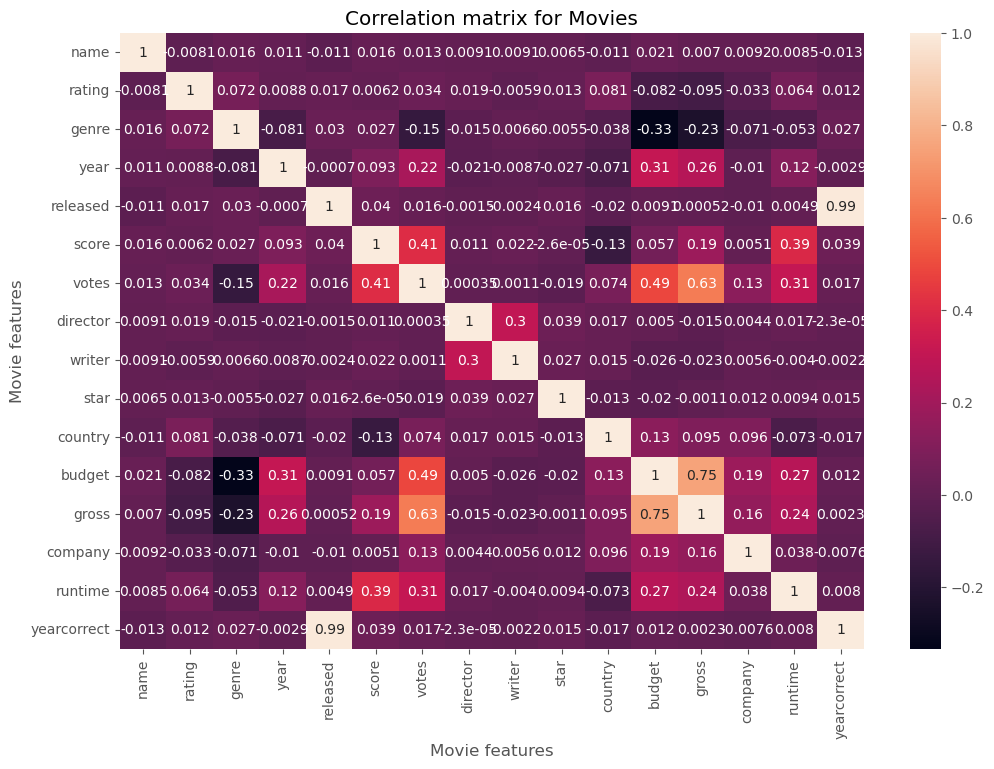

In [24]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [25]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.016377   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613  0.006192   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027384   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.092616   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.039814   
score        0.016377  0.006192  0.027384  0.092616  0.039814  1.000000   
votes        0.013038  0.033743 -0.145296  0.222427  0.015878  0.407101   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.010568   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.022098   
star         0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.000026   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133346   
budget       0.020548 -0.081939 -0.334021  0.309212  0.009145  0.056863   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000519  0.186012   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.005081   
runtime      0.008483  0.064133 -0.052914  0.116358  0.004852  0.394564   
yearcorrect -0.013132  0.012429  0.027305 -0.002885  0.994590  0.038923   

                votes  director    writer      star   country    budget  \
name         0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score        0.407101  0.010568  0.022098 -0.000026 -0.133346  0.056863   
votes        1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director     0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632870 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
yearcorrect  0.016978 -0.000023 -0.002235  0.015330 -0.017117  0.011545   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.008483    -0.013132  
rating      -0.095450 -0.032943  0.064133     0.012429  
genre       -0.234297 -0.071067 -0.052914     0.027305  
year         0.261900 -0.010431  0.116358    -0.002885  
released     0.000519 -0.010474  0.004852     0.994590  
score        0.186012  0.005081  0.394564     0.038923  
votes        0.632870  0.133457  0.306984     0.016978  
director    -0.014916  0.004404  0.017062    -0.000023  
writer      -0.022997  0.005646 -0.004036    -0.002235  
star        -0.001129  0.012442  0.009418     0.015330  
country      0.095325  0.095548 -0.073319    -0.017117  
budget       0.750157  0.186474  0.268372     0.011545  
gross        1.000000  0.156745  0.244339     0.002322  
company      0.156745  1.000000  0.037537    -0.007622  
runtime      0.244339  0.037537  1.000000     0.007999  
yearcorrect  0.002322 -0.007622  0.007999     1.000000

In [26]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect   -0.013132
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [27]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
country      score         -0.133346
score        country       -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.073319
country      runtime       -0.073319
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
country      genre         -0.037615
company      rating        -0.032943
rating       company       -0.032943
star         year          -0.027242
y

In [28]:
high_pairs = sorted_pairs[(sorted_pairs) > 0.5]

high_pairs


gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  released       0.994590
released     yearcorrect    0.994590
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [29]:
# Gross and Votes have the highest correlation